In [2]:
pip install graphviz

                                              0.0/47.0 kB ? eta -:--:--
     ----------------------------------       41.0/47.0 kB ? eta -:--:--
     ----------------------------------       41.0/47.0 kB ? eta -:--:--
     -------------------------------------- 47.0/47.0 kB 391.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [5]:
df = pd.read_csv('Credit.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [6]:
previsores = df.iloc[:, 0:20].values
classe = df.iloc[:, 20].values

In [7]:
labelencoder = LabelEncoder()

# Colunas para codificar
columns_to_encode0 = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]

# Aplicando a transformação para as colunas selecionadas
for col in columns_to_encode0:
    previsores[:, col] = labelencoder.fit_transform(previsores[:, col])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(previsores, classe,
                                                    test_size = 0.3, random_state = 0)

In [9]:
arvore = DecisionTreeClassifier()
arvore.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
export_graphviz(arvore, out_file = 'tree.dot')

In [12]:
previsoes = arvore.predict(x_test)
previsoes

array(['bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 

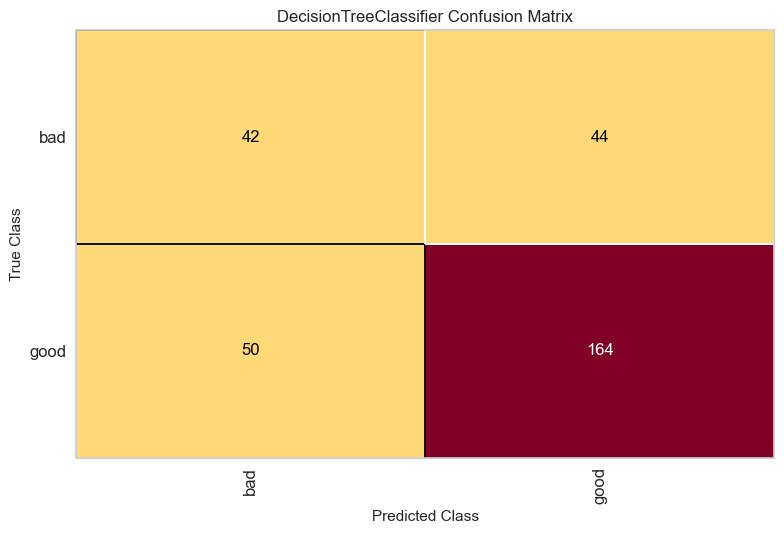

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(x_train, y_train)
v.score(x_test, y_test)
v.show()

In [16]:
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.6866666666666666

In [17]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.31333333333333335